In [17]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [18]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
gender_df=df.groupby('gender')

In [21]:
Female_ds=gender_df.salary.groups['F']
Male_ds=gender_df.salary.groups['M']

In [22]:
Male_ds.shape,Female_ds.shape

((139,), (76,))

In [28]:
sample_size = 70
female_sampled = np.random.normal(Female_ds, sample_size)
male_sampled = np.random.normal(Male_ds, sample_size)

0.9899218678474426 0.4158335030078888

 0.9851160645484924 0.5179554224014282


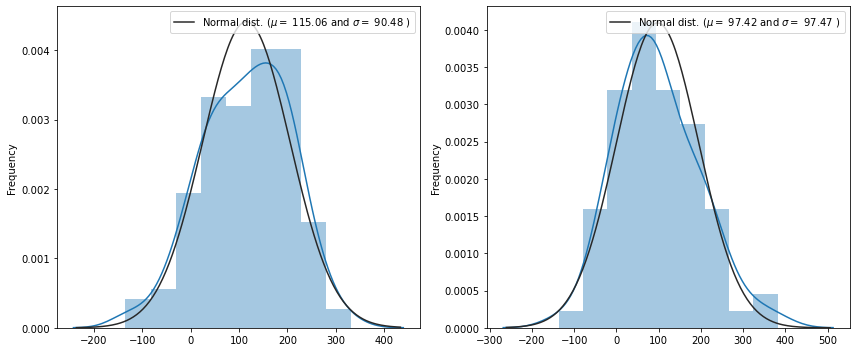

In [29]:
plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

#plt.subplots(figsize=(8,5))
sns.distplot(male_sampled,fit=stats.norm,ax=ax1)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(male_sampled)

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
ax2 = plt.subplot(1,2,2)
#plt.subplots(figsize=(8,5))
sns.distplot(female_sampled,fit=stats.norm,ax=ax2)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(female_sampled)
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
W,p=stats.shapiro(male_sampled)#data is not normally distributed as p value is less than 0.05
print(W,p)
W,p=stats.shapiro(female_sampled)#data is not normally distributed as p value is less than 0.05
print("\n",W,p)


In [30]:
stats.levene(male_sampled,female_sampled)#variance are equal as p-value is greater than 0.05

LeveneResult(statistic=0.08313235745562725, pvalue=0.7733769527506493)

In [31]:
# WELCH’S T-TEST ASSUMPTIONS (independent T-Test with unequal variance)
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2,equal_var=True)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Gender doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Gender affect Salaries (reject H0)')
    

In [32]:
compare_2_groups(female_sampled, male_sampled, 0.05, sample_size)

Statistics=-1.323, p=0.187
Same distributions-Gender doesnot affect Salaries (fail to reject H0)
